# International Football Match Analysis

In this time, we will analyze the international football match dataset. The contains many data about International Football Match like which team play or match score and etc. So this time we will analyze some interesting data about the dataset.

## Downloading the Dataset

We will get the data set from https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
# Change this
dataset_url = 'https://github.com/malifalhakim/Data-Science/blob/03d3905e814d51962cba42a20a91e6f41c1e34cf/International%20Football%20Match/results.csv' 
dataset_url2 = 'https://raw.githubusercontent.com/malifalhakim/Data-Science/main/shootouts.csv'

In [2]:
from urllib.request import urlretrieve
urlretrieve(dataset_url,'results.csv')
urlretrieve(dataset_url2,'shootouts.csv')

('shootouts.csv', <http.client.HTTPMessage at 0x7f6178711700>)

The dataset has been downloaded and extracted.

In [3]:
# Change this
data_dir = '.'

In [4]:
import os
os.listdir(data_dir)

['.bash_logout',
 '.bashrc',
 '.profile',
 '.local',
 '.ipython',
 '.jovianrc',
 'shootouts.csv',
 '.cache',
 'results.csv',
 '.jupyter',
 '.jovian',
 'International_Football_Match_Analysis.ipynb',
 '.ipynb_checkpoints',
 '.npm',
 'work',
 '.git',
 '.wget-hsts',
 '.config',
 '.conda']

## Data Preparation and Cleaning

Load the dataset into Pandas Data Frame 
<br>DO Some Preparation before analyzing it. 
<br>Like add or delete column, Handle invalid value
and others.



In [5]:
import pandas as pd
import numpy as np

load the dataset into a data frame using pandas

In [6]:
df = pd.read_csv('results.csv')

Explore the range of values

In [7]:
df.describe()

,home_score,away_score
count,44059.000000,44059.000000
mean,1.740507,1.178306
std,1.747525,1.394815
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


find the info about column and row also find invalid value

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44060 entries, 0 to 44059
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        44060 non-null  object 
 1   home_team   44060 non-null  object 
 2   away_team   44060 non-null  object 
 3   home_score  44059 non-null  float64
 4   away_score  44059 non-null  float64
 5   tournament  44060 non-null  object 
 6   city        44060 non-null  object 
 7   country     44060 non-null  object 
 8   neutral     44060 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.7+ MB


all the column have 44060 data but except home_score and away_score.
<br>so we can know there are 2 invalid values

In [9]:
df[df['home_score'].isna()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44059,2022-09-30,Fiji,Solomon Islands,NaN,NaN,MSG Prime Minister's Cup,Luganville,Vanuatu,True


so we know where the data is invalid
to handle that, we can delete the entire row about the match

In [10]:
df.drop(index = [44059],inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44059 entries, 0 to 44058
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        44059 non-null  object 
 1   home_team   44059 non-null  object 
 2   away_team   44059 non-null  object 
 3   home_score  44059 non-null  float64
 4   away_score  44059 non-null  float64
 5   tournament  44059 non-null  object 
 6   city        44059 non-null  object 
 7   country     44059 non-null  object 
 8   neutral     44059 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 3.1+ MB


We can delete some columns that we not use it.
<br>Because we don't need about the city data we can delete it

In [12]:
df.drop(columns = ['city'],inplace = True)

Also we need to change the data type value in date column to pandas format

In [13]:
df['date'] = pd.to_datetime(df['date'])

We can also change the data type of match score

In [14]:
df = df.astype({'home_score':'int64','away_score':'int64'})

Add column Winner for the team who win the match or draw if the match is draw

In [15]:
df['Winner'] = df[df['home_score'] > df['away_score']]['home_team'] 
df['Winner'] = df['Winner'].fillna(df[df['home_score'] < df['away_score']]['away_team'])
df['Winner'] = df['Winner'].fillna('DRAW')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44059 entries, 0 to 44058
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44059 non-null  datetime64[ns]
 1   home_team   44059 non-null  object        
 2   away_team   44059 non-null  object        
 3   home_score  44059 non-null  int64         
 4   away_score  44059 non-null  int64         
 5   tournament  44059 non-null  object        
 6   country     44059 non-null  object        
 7   neutral     44059 non-null  bool          
 8   Winner      44059 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 3.1+ MB


Because we want to analyze the data from 2000 and is a Prestigeous Match, We need filter the datetime in dataframe first

In [17]:
prestigeous_match = ('African Cup of Nations','FIFA World Cup qualification','AFC Asian Cup qualification','AFF Championship','FIFA World Cup','UEFA Euro qualification','UEFA Euro','AFC Asian Cup','Copa América')

In [18]:
df = df[df['date'] > '2000-01-01']
df = df[df['tournament'].isin(prestigeous_match)]

Our dataset is ready for analyzing and visualization

In [19]:
df

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Winner
22796,2000-01-22,Ghana,Cameroon,1,1,African Cup of Nations,Ghana,False,DRAW
22797,2000-01-23,China PR,Philippines,8,0,AFC Asian Cup qualification,Vietnam,True,China PR
22798,2000-01-23,Egypt,Zambia,2,0,African Cup of Nations,Nigeria,True,Egypt
22800,2000-01-23,Nigeria,Tunisia,4,2,African Cup of Nations,Nigeria,False,Nigeria
22801,2000-01-23,South Africa,Gabon,3,1,African Cup of Nations,Ghana,True,South Africa
...,...,...,...,...,...,...,...,...,...
43890,2022-06-14,India,Hong Kong,4,0,AFC Asian Cup qualification,India,False,India
43891,2022-06-14,Bahrain,Turkmenistan,1,0,AFC Asian Cup qualification,Malaysia,True,Bahrain
43892,2022-06-14,Malaysia,Bangladesh,4,1,AFC Asian Cup qualification,Malaysia,False,Malaysia
43893,2022-06-14,Myanmar,Singapore,2,6,AFC Asian Cup qualification,Kyrgyzstan,True,Singapore


## Exploratory Analysis and Visualization

We will analyze the dataset that we have prepared erlier.
<br>We will analyze about goal, the most winning team, and others
interesting fact about the dataset.
<br>And we will make a graphic for each interesting fact that we will find



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (16, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**FIRST ANALYSIS** - Country with the most win in international football match

First, count the win match of each country

In [21]:
winner_counts = df['Winner'].value_counts()[1:].head(10)

Plot the bar

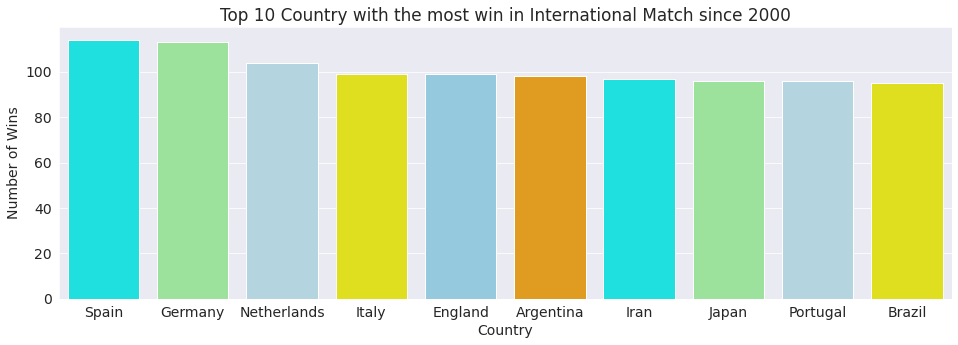

In [22]:
sns.barplot(x = winner_counts.index,y = winner_counts, palette = ['cyan','lightgreen','lightblue','yellow','skyblue','orange']);

plt.xlabel('Country');
plt.ylabel('Number of Wins');
plt.title('Top 10 Country with the most win in International Match since 2000');

From the bar we know that Spain is the team with the most win since 2000. And Follow with Germany in the second place
<br>
Also dont forget that the match that is counted is only major match like World cup, and continental cup

**SECOND ANALYSIS** - Top 10 Country with the most goal in International Match

Create the dataframe that contain information about the goal that was scored by each country

In [23]:
df_goal_home = df.groupby(['home_team'])[['home_score']].sum().reset_index()
df_goal_away = df.groupby(['away_team'])[['away_score']].sum().reset_index()

df_goal = df_goal_away 
df_goal['home_score'] = df_goal_home['home_score']
df_goal['goal'] = df_goal['away_score'] + df_goal['home_score']

df_goal.drop(columns = ['away_score','home_score'],inplace = True)
df_goal.rename(columns = {'away_team':'team'},inplace = True)

df_most_goal = df_goal.sort_values('goal',ascending = False).head(10)

Plot the bar

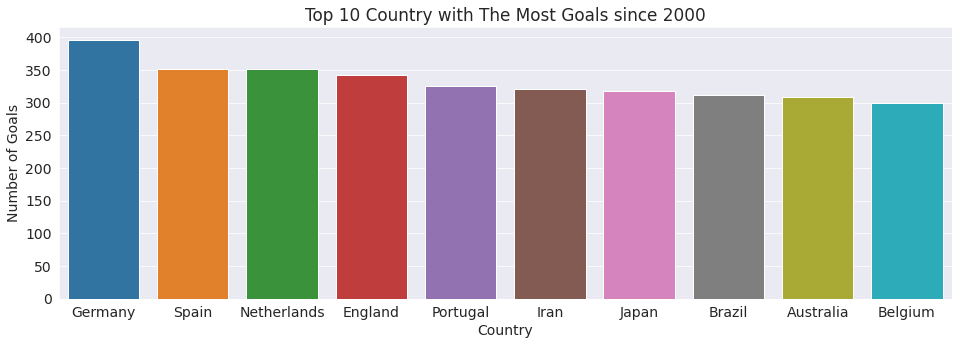

In [24]:
sns.barplot(x = 'team' , y = 'goal', data = df_most_goal.head(10));

plt.ylabel('Number of Goals')
plt.xlabel('Country')
plt.title('Top 10 Country with The Most Goals since 2000');

From the bar we know that the team with the most goal is Germany.
<br>
Spain that has the most win are in second place in terms of goals 

**THIRD ANALYSIS** - Most favorited opponent by the top 5 country with the most win

create a dataframe that count what country the top 5 team most win the game 

In [25]:
lst_winner = list(winner_counts.index)

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
df_winner = df[df['Winner'].isin(lst_winner[:5])]
df_winner['Lose'] = df_winner[df_winner['Winner'] != df_winner['home_team']].loc[:,'home_team']

In [28]:
df_winner['Lose'] = df_winner['Lose'].fillna(df_winner[df_winner['Winner'] != df_winner['away_team']].loc[:,'away_team'])

PLOT THE BAR

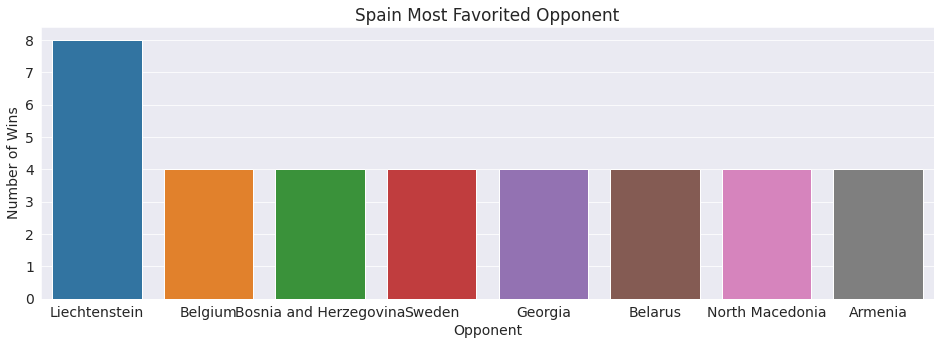

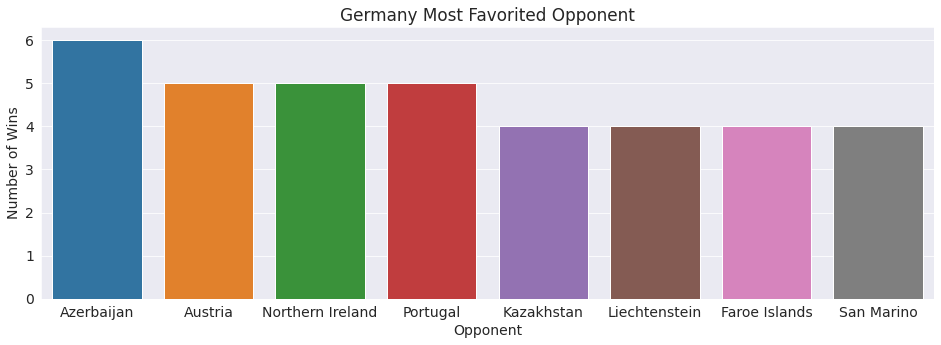

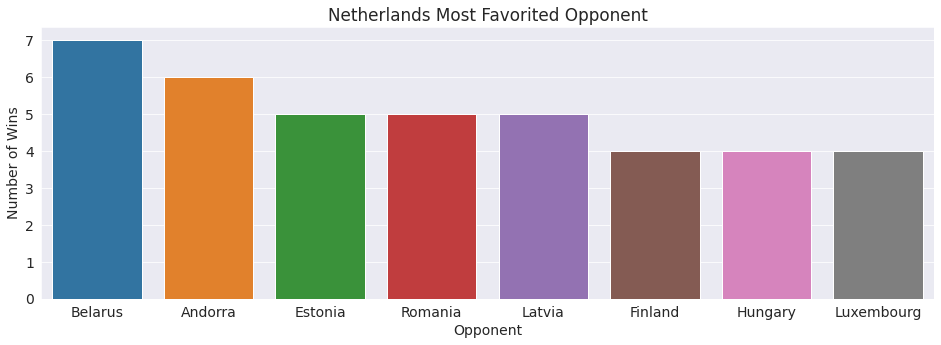

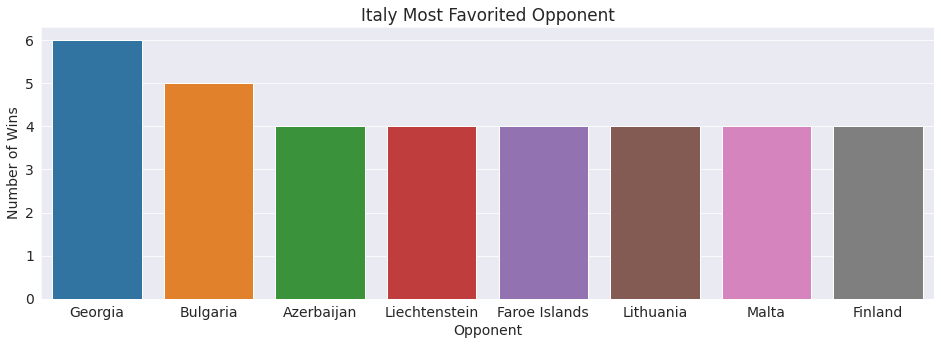

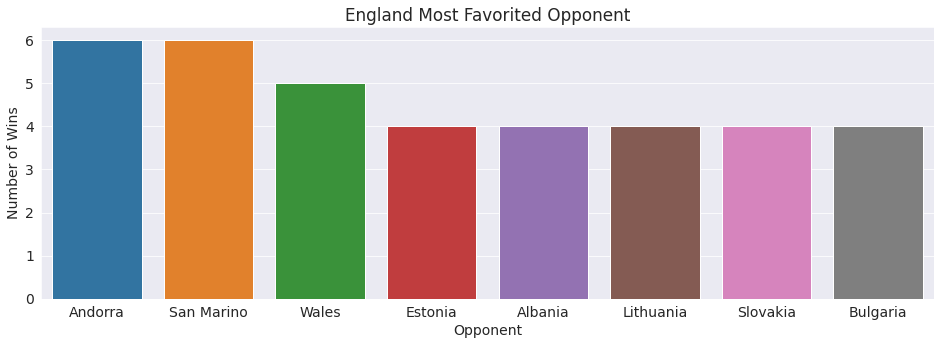

In [29]:
for country in lst_winner[:5]:
    df_country = df_winner[df_winner['Winner'] == country]
    df_country = df_country['Lose'].value_counts().head(8)
    sns.barplot(x = df_country.index , y = df_country)
    plt.xlabel('Opponent')
    plt.ylabel('Number of Wins')
    plt.title(f'{country} Most Favorited Opponent')
    plt.show()
    

The graph contains information about the opponents that are often defeated by the top 5 teams that have won the most
<br>
From the graph we know Spain most favorited opponent is Liechsteins, Germany is Azerbaijan, Netherlands is Belarus
<br>
Italy is Georgia, and England is Andorra

**FOURTH ANALYSIS** - Country with the most goal for each competition

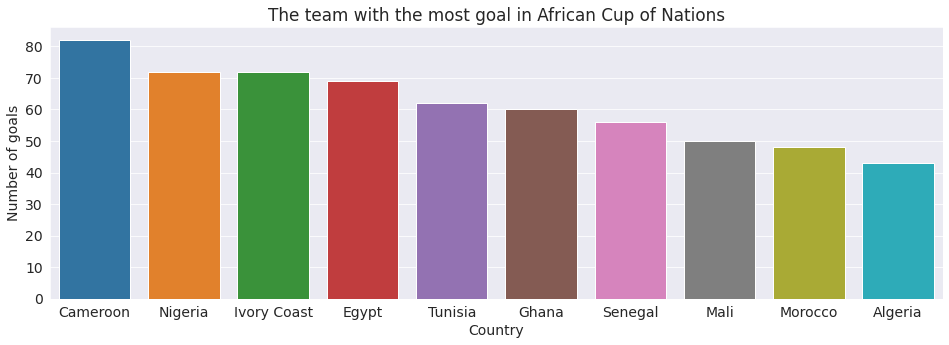

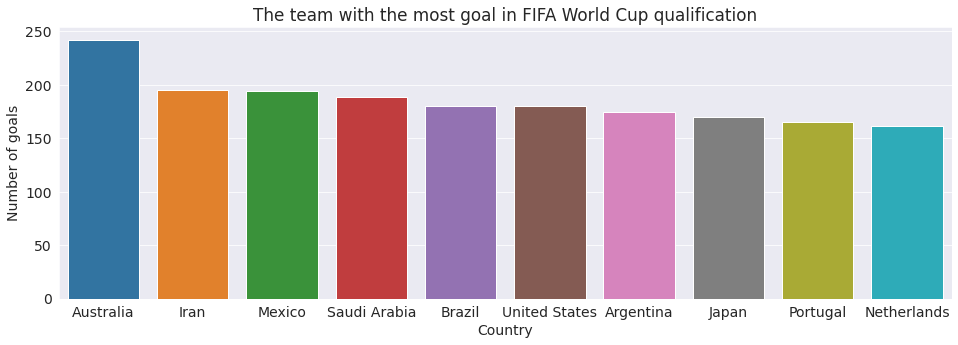

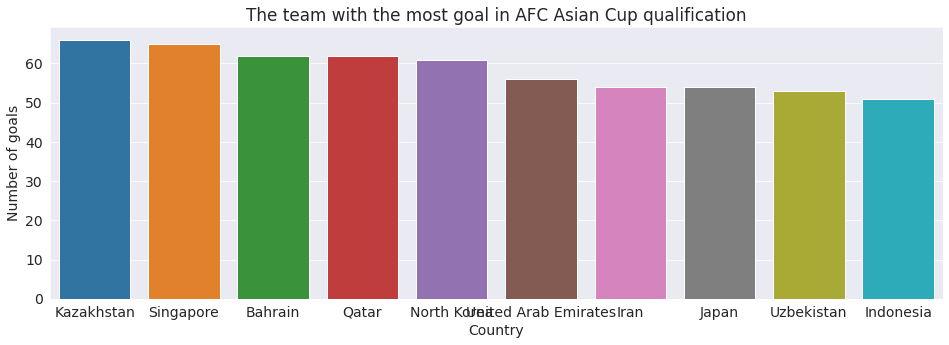

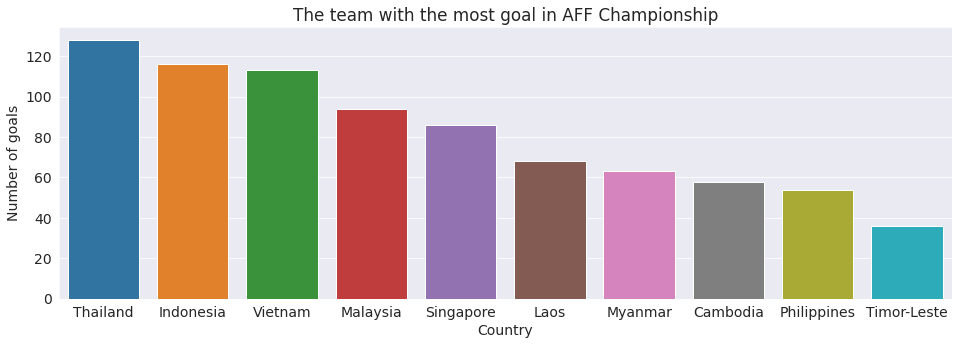

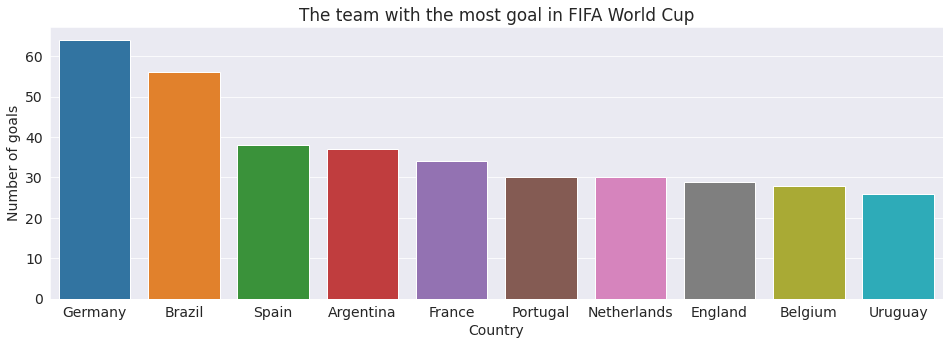

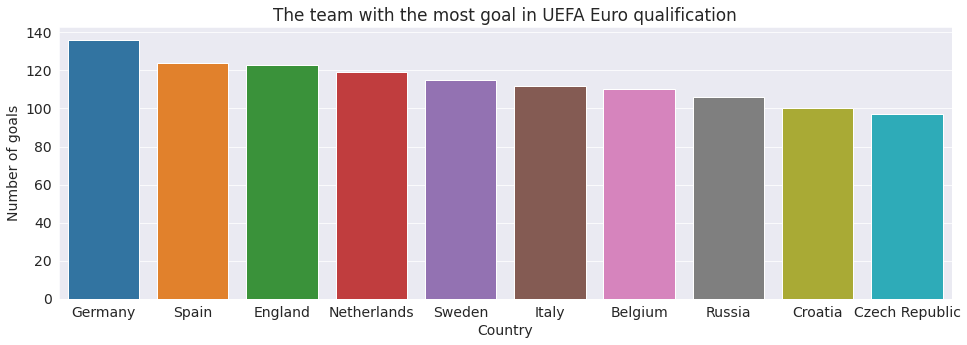

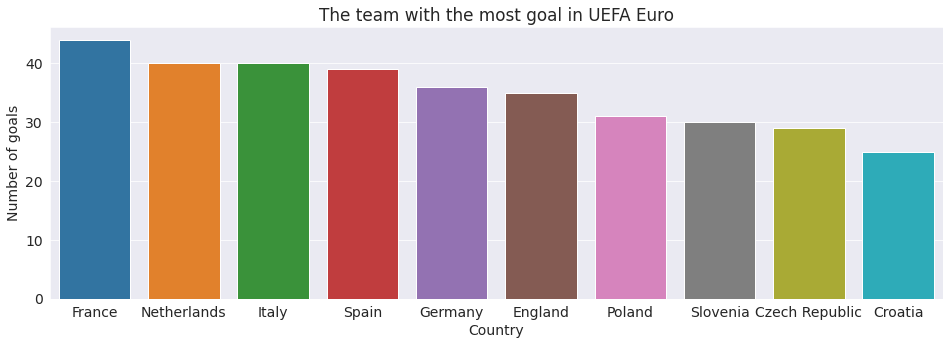

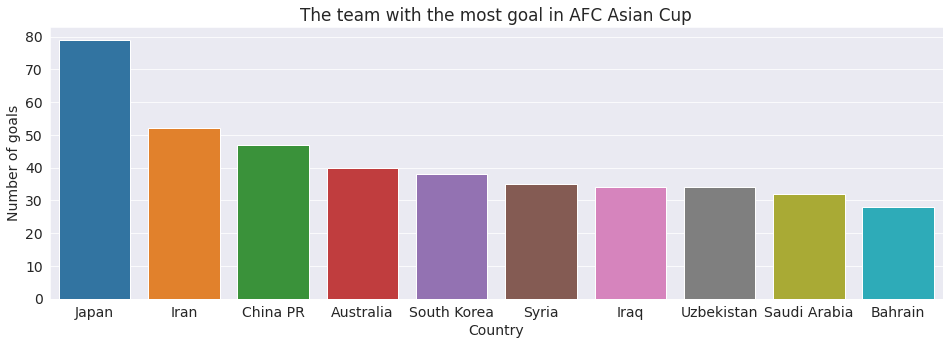

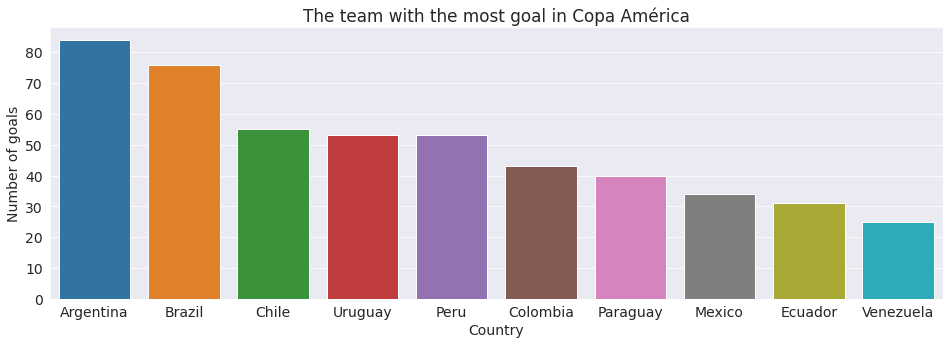

In [30]:
for comp in prestigeous_match:
    df_competition = df[df['tournament'] == comp ]

    df_goal_home = df_competition.groupby(['home_team'])[['home_score']].sum().reset_index()
    df_goal_away = df_competition.groupby(['away_team'])[['away_score']].sum().reset_index()
    df_goal = df_goal_away 
    df_goal['home_score'] = df_goal_home['home_score']
    df_goal['goal'] = df_goal['away_score'] + df_goal['home_score']
    df_goal.drop(columns = ['away_score','home_score'],inplace = True)
    df_goal.rename(columns = {'away_team':'team'},inplace = True)
    df_goal = df_goal.sort_values('goal',ascending = False)

    sns.barplot(x= 'team', y = 'goal', data = df_goal.head(10))
    plt.xlabel('Country')
    plt.ylabel('Number of goals')
    plt.title(f'The team with the most goal in {comp}')
    plt.show()

From the graph we can find out each team with the most goals for each competition.
<br>
For example Germany has the most goal in Fifa World cup, and France has the most goal in Euro
<br>
From the graph we also know that Spain don't have the most goals in Any Competition,but win more match than other team

## Asking and Answering Questions

We will ask and also answering questions about the dataset
<br>
We answer the question by computing the results using Numpy/Pandas
<br>
or Data Visualization using Matplotlib/Seaborn

#### Q1: FIRST QUESTION - what is the match with the most goal?

In [31]:
df_copy = df.copy(True)

In [32]:
df_copy['goal'] = df_copy['home_score'] + df_copy['away_score']

In [33]:
df_copy = df_copy.sort_values(['goal'],ascending = False)

In [34]:
df_copy

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Winner,goal
24124,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Australia,False,Australia,31
24121,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Australia,False,Australia,22
22895,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait,False,Kuwait,20
22808,2000-01-26,China PR,Guam,19,0,AFC Asian Cup qualification,Vietnam,True,China PR,19
23783,2000-11-24,Iran,Guam,19,0,FIFA World Cup qualification,Iran,False,Iran,19
...,...,...,...,...,...,...,...,...,...,...
31041,2008-10-11,Bulgaria,Italy,0,0,FIFA World Cup qualification,Bulgaria,False,DRAW,0
31008,2008-09-10,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Uruguay,False,DRAW,0
30994,2008-09-10,Northern Ireland,Czech Republic,0,0,FIFA World Cup qualification,Northern Ireland,False,DRAW,0
30992,2008-09-10,Montenegro,Republic of Ireland,0,0,FIFA World Cup qualification,Montenegro,False,DRAW,0


From the pandas dataframe we know that the most goals scored in the match was when Australia faced American Samoan in the World Cup Qualifiers. In that match Australia win with 31 - 0

#### Q2: SECOND QUESTION - What is team with the best GD

First We need to build dataframe that contains GD

In [35]:
df_copy.drop(columns = ['goal'],inplace = True)
df_team_home = df_copy.groupby(['home_team'])[['home_score','away_score']].sum().reset_index()
df_team_away = df_copy.groupby(['away_team'])[['home_score','away_score']].sum().reset_index()

df_team = df_team_home
df_team['goals'] = df_team_home['home_score'] + df_team_away['away_score']
df_team['conceded'] = df_team_home['away_score'] + df_team_away['home_score']
df_team.drop(columns = ['home_score','away_score'], inplace = True)

df_team.rename(columns={'home_team':'Team'},inplace = True)
df_team['GD'] = df_team['goals'] - df_team['conceded']
df_team = df_team.sort_values(['GD'],ascending = False)

In [36]:
df_team.head(11)

,Team,goals,conceded,GD
73,Germany,396,122,274
176,Spain,352,99,253
60,England,342,96,246
131,Netherlands,351,114,237
90,Iran,321,95,226
96,Japan,318,105,213
11,Australia,308,101,207
150,Portugal,326,129,197
27,Brazil,312,117,195
93,Italy,279,103,176


In [37]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 73 to 161
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Team      211 non-null    object
 1   goals     211 non-null    int64 
 2   conceded  211 non-null    int64 
 3   GD        211 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.2+ KB


We need to check whether all countries have been included in the dataframe that we created or in other words all countries in our data have been a home team

In [38]:
lst_country = set(pd.concat([df['home_team'],df['away_team']],axis = 0))

In [39]:
len(lst_country)

211

From lst_country we know that we have included all country to our dataframe

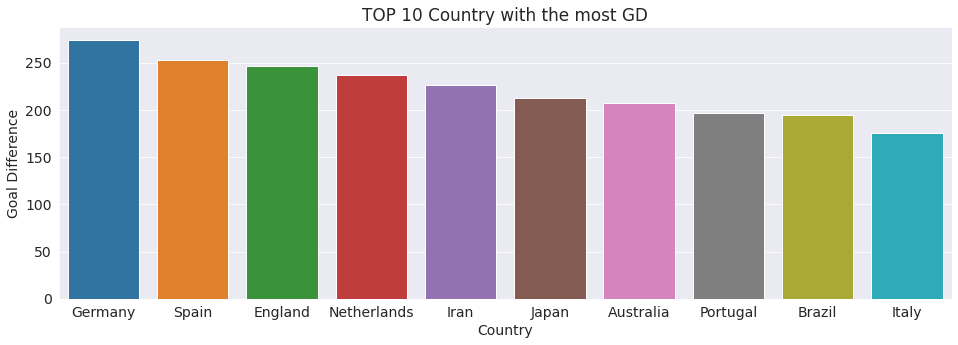

In [40]:
sns.barplot(x = 'Team', y = 'GD', data = df_team.head(10));
plt.xlabel('Country');
plt.ylabel('Goal Difference');
plt.title('TOP 10 Country with the most GD');

From the bar, we know that Germany is the team with the best goal difference
<br>
In the bar, we also know ,although Netherlands have more goal than England but in
<br>
terms of goal difference England is better than Netherlands because they conceded less goal

#### Q3: THIRD QUESTION - Which country hosts the World Cup since 2000?

In [41]:
df_country = df_copy[df['tournament'] == 'FIFA World Cup']

In [42]:
df_country.groupby(['country'])[['country']].count()

,country
country,
Brazil,64
Germany,64
Japan,32
Russia,64
South Africa,64
South Korea,32


From the table we can see that the countries that have hosted the world cup since 2000 are 
<br>
Brazil, Germany, Japan, Russia, South Africa, South Korea

#### Q4: FOURTH QUESTION - In what year did Spain win the most matches in a major competition

In [43]:
df_spain = df_copy[df_copy['Winner'] == 'Spain']

In [44]:
df_spain = df_spain.groupby(df_spain['date'].dt.year)[['Winner']].count()

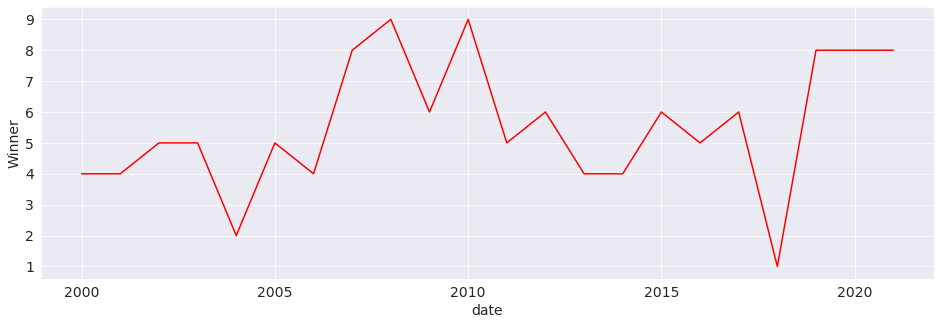

In [55]:
sns.lineplot(x='date',y='Winner',data=df_spain,color = 'r');

In [56]:
df_spain

,Winner
date,
2000,4
2001,4
2002,5
2003,5
2004,2
2005,5
2006,4
2007,8
2008,9


From the graph we know that Spain won the most matches in 2010 and 2008. At that time they managed to win the UEFA Euro and FIFA World Cup.

Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

The team with the most wins in international matches is Spain, but some statistics such as top scorer and goal difference are held by Germany. And we also see some unique data such as the match with the most goals in one match is Australia against America Samoa or we also know the team with the most goals for each competition.

## References

References : Kaggle
<br>
